In [1]:
import pandas as pd
import matplotlib.pyplot as plt

daily_sentiment = pd.read_csv("../data/daily_sentiment.csv")


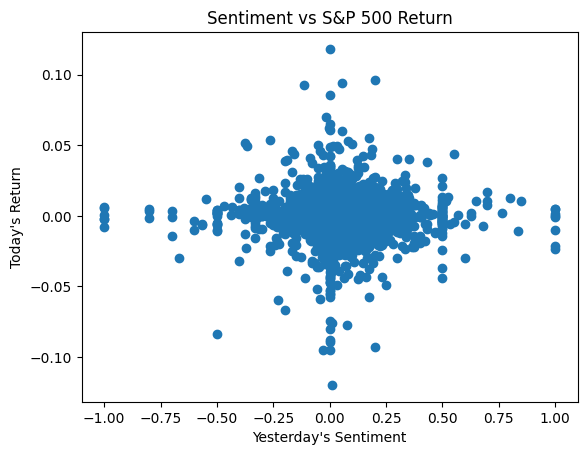

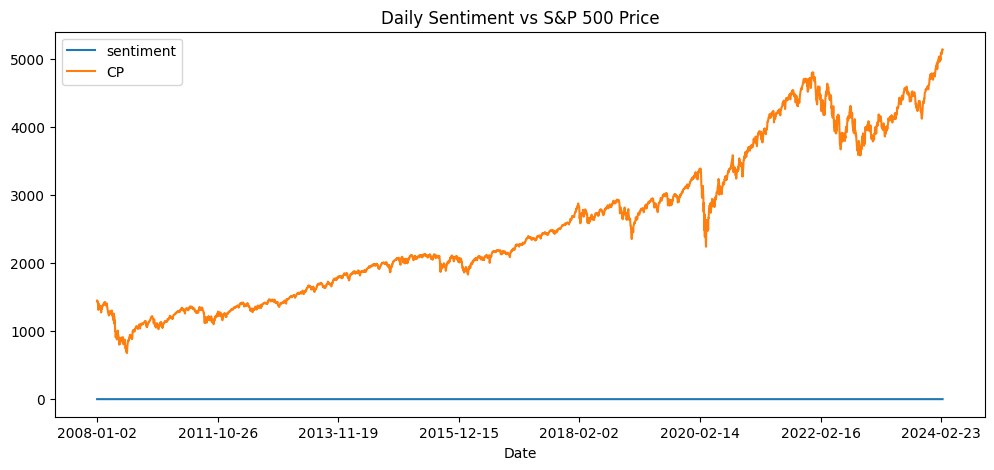

In [2]:
# Scatter plot
plt.scatter(daily_sentiment['sentiment_shifted'], daily_sentiment['return'])
plt.xlabel("Yesterday's Sentiment")
plt.ylabel("Today's Return")
plt.title("Sentiment vs S&P 500 Return")
plt.show()

# Time series
daily_sentiment.set_index('Date')[['sentiment', 'CP']].plot(figsize=(12,5))
plt.title("Daily Sentiment vs S&P 500 Price")
plt.show()

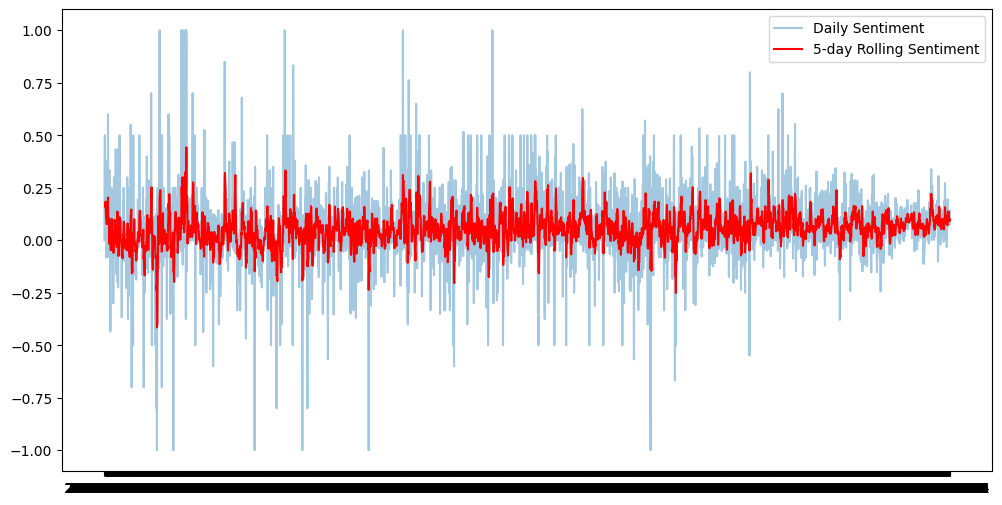

In [3]:
daily_sentiment['sentiment_rolling'] = daily_sentiment['sentiment'].rolling(5).mean()


plt.figure(figsize=(12,6))
plt.plot(daily_sentiment['Date'], daily_sentiment['sentiment'], alpha=0.4, label='Daily Sentiment')
plt.plot(daily_sentiment['Date'], daily_sentiment['sentiment_rolling'], color='red', label='5-day Rolling Sentiment')
plt.legend()
plt.show()


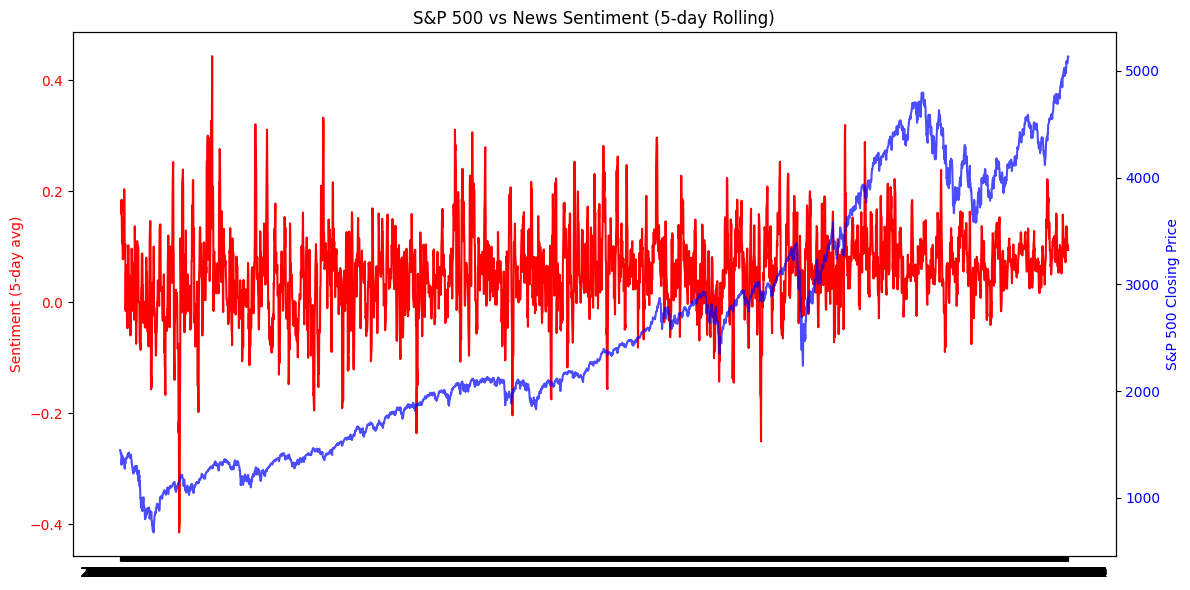

In [4]:
# Rolling average
daily_sentiment['sentiment_rolling'] = daily_sentiment['sentiment'].rolling(5).mean()

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot sentiment (left axis)
ax1.plot(daily_sentiment['Date'], daily_sentiment['sentiment_rolling'], 
         color='red', label='5-day Rolling Sentiment')
ax1.set_ylabel("Sentiment (5-day avg)", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create second axis for stock price
ax2 = ax1.twinx()
ax2.plot(daily_sentiment['Date'], daily_sentiment['CP'], 
         color='blue', alpha=0.7, label='Closing Price')
ax2.set_ylabel("S&P 500 Closing Price", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title + legends
plt.title("S&P 500 vs News Sentiment (5-day Rolling)")
fig.tight_layout()
plt.show()


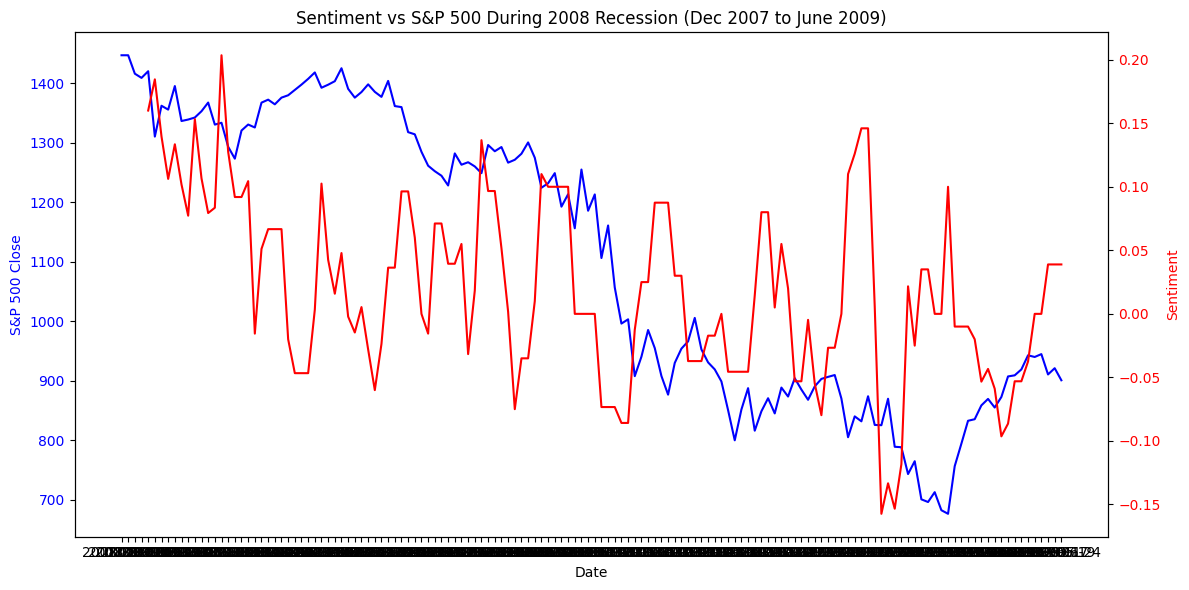

Overall correlation between sentiment and returns: 0.04978728432802766
Correlation during 2008 recession: -0.05281303621541941


In [9]:
# Context: 2008 Recession

# Filter Recession Period

mask = (daily_sentiment['Date'] >= "2007-12-01") & (daily_sentiment['Date'] <= "2009-06-30")
recession_data = daily_sentiment.loc[mask]

# Plot showing correlations
fig, ax1 = plt.subplots(figsize=(12,6))

# S&P prices
ax1.set_xlabel("Date")
ax1.set_ylabel("S&P 500 Close", color="blue")
ax1.plot(recession_data['Date'], recession_data['CP'], color="blue", label="S&P 500")
ax1.tick_params(axis="y", labelcolor="blue")

# Sentiment (rolling to smooth noise)
ax2 = ax1.twinx()
ax2.set_ylabel("Sentiment", color="red")
ax2.plot(recession_data['Date'], recession_data['sentiment'].rolling(5).mean(), color="red", label="Sentiment (5d rolling)")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Sentiment vs S&P 500 During 2008 Recession (Dec 2007 to June 2009)")
fig.tight_layout()
plt.show()

# Correlation during 2008 recession
corr = recession_data['sentiment'].corr(recession_data['return'])
corr_full = daily_sentiment['sentiment'].corr(daily_sentiment['return'])

print("Overall correlation between sentiment and returns:", corr_full)
print("Correlation during 2008 recession:", corr)


In [6]:
'''
From this data, we can see that the overall correlation is low. This means sentiment from headlines don't really have an effect
on stock prices. During the 2008 recession, correlation was slightly negative. This suggests sentiment trended a bit more negative
but not strongly predictive
'''

"\nFrom this data, we can see that the overall correlation is low. This means sentiment from headlines don't really have an effect\non stock prices. During the 2008 recession, correlation was slightly negative. This suggests sentiment trended a bit more negative\nbut not strongly predictive\n"

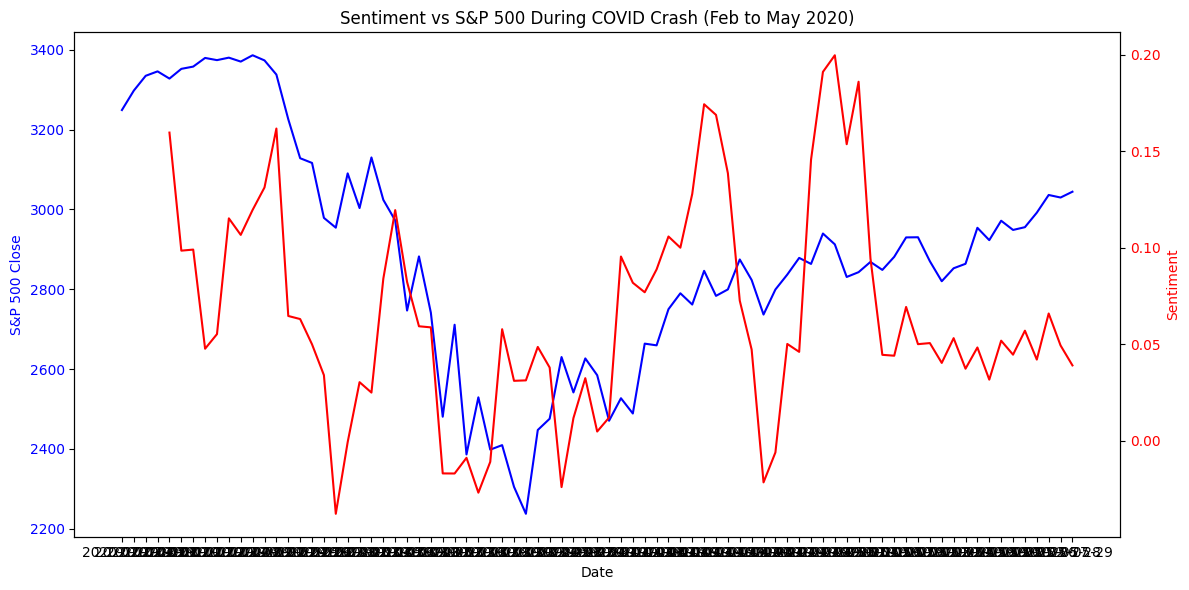

Correlation between sentiment and returns during COVID crash: 0.169533348244778


In [7]:
# Context: 2020 Pandemic

# Filter Pandemic Period

mask = (daily_sentiment['Date'] >= "2020-02-01") & (daily_sentiment['Date'] <= "2020-05-30")
covid_data = daily_sentiment.loc[mask]

# Plot showing correlations
fig, ax1 = plt.subplots(figsize=(12,6))

# S&P prices
ax1.set_xlabel("Date")
ax1.set_ylabel("S&P 500 Close", color="blue")
ax1.plot(covid_data['Date'], covid_data['CP'], color="blue", label="S&P 500")
ax1.tick_params(axis="y", labelcolor="blue")

# Sentiment (rolling)
ax2 = ax1.twinx()
ax2.set_ylabel("Sentiment", color="red")
ax2.plot(covid_data['Date'], covid_data['sentiment'].rolling(5).mean(), color="red", label="Sentiment (5d rolling)")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Sentiment vs S&P 500 During COVID Crash (Feb to May 2020)")
fig.tight_layout()
plt.show()

# Correlation during 2020 Pandemic
corr_covid = covid_data['sentiment'].corr(covid_data['return'])
print("Correlation between sentiment and returns during COVID crash:", corr_covid)


In [8]:
'''
Sentiment headlines dont necessarily explain changes in price. However, its influence increases over extreme market stress such as
during the 2008 recession or 2020 COVID Pandemic
'''

'\nSentiment headlines dont necessarily explain changes in price. However, its influence increases over extreme market stress such as\nduring the 2008 recession or 2020 COVID Pandemic\n'

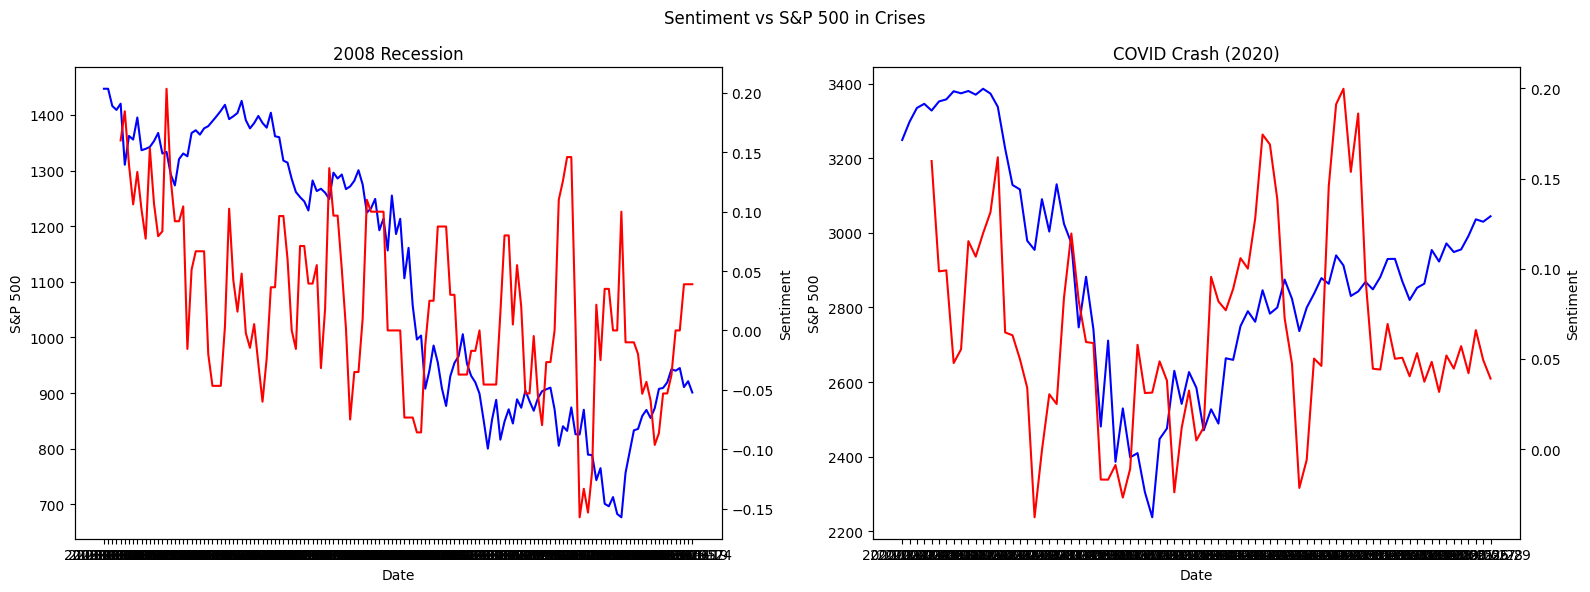

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=False)

# 2008 recession
axes[0].plot(recession_data['Date'], recession_data['CP'], color="blue", label="S&P 500")
axes[0].set_title("2008 Recession")
ax2_2008 = axes[0].twinx()
ax2_2008.plot(recession_data['Date'], recession_data['sentiment'].rolling(5).mean(),
              color="red", label="Sentiment (5d rolling)")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("S&P 500")
ax2_2008.set_ylabel("Sentiment")

# 2020 COVID crash
axes[1].plot(covid_data['Date'], covid_data['CP'], color="blue", label="S&P 500")
axes[1].set_title("COVID Crash (2020)")
ax2_covid = axes[1].twinx()
ax2_covid.plot(covid_data['Date'], covid_data['sentiment'].rolling(5).mean(),
               color="red", label="Sentiment (5d rolling)")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("S&P 500")
ax2_covid.set_ylabel("Sentiment")

plt.suptitle("Sentiment vs S&P 500 in Crises")
plt.tight_layout()
plt.show()


In [12]:
# Build summary dictionary
results = {
    "Full Sample": daily_sentiment['sentiment'].corr(daily_sentiment['return']),
    "2008 Recession": recession_data['sentiment'].corr(recession_data['return']),
    "COVID Crash": covid_data['sentiment'].corr(covid_data['return']),
}

# Convert to DataFrame
summary_table = pd.DataFrame.from_dict(results, orient="index", columns=["Correlation"])

# Round values for readability
summary_table = summary_table.round(3)

print(summary_table)


                Correlation
Full Sample           0.050
2008 Recession       -0.053
COVID Crash           0.170
